# Allgemeine Relativitätstheorie mit dem Computer 
# General Theory of Relativity on the Computer

## Vorlesung gehalten an der J.W.Goethe-Universität in Frankfurt am Main (Sommersemester 2021)

### von Dr.phil.nat. Dr.rer.pol. Matthias Hanauske

### Frankfurt am Main 17.06.2021


## Dritter Vorlesungsteil: Neutronenstern Kollisionen mit dem Einstein Toolkit


## Einführung in den (3+1)-Split

In den bisherigen Jupyter-Notebooks, sowohl bei der Analyse der Bewegungen um ein rotierendes/nicht-rotierendes schwarzes Loch als auch bei der Berechnung der Eigenschaften von Neutronensternen, hatten wir zeitunabh&auml;ngige Raumzeiten betrachtet. Die zugrundeliegende Metrik $g_{\mu\nu}$ der betrachteten 4-dimensionale Mannigfaltigkeit ${\cal M}$ ver&auml;nderte sich nicht mit der Zeit und hatte eine vorgegebene r&auml;umliche Symmetrie. In diesem Jupyter-Notebook wird einen Einblick in eine Softwareplattform <A href="https://einsteintoolkit.org/" target="_blank">Einstein Toolkit</A> gegeben, mit der man zeitabh&auml;ngige allgemein-relativistische Berechnungen, wie z.B. die Kollision zweier Neutronensterne durchf&uuml;hren kann. 

Realistische astrophysikalische Computersimulationen m&uuml;ssen die Einstein- und die zugeh&ouml;rigen hydrodynamischen Gleichungen ohne spezielle Symmetrie-Annahmen zeitabh&auml;ngig l&ouml;sen. Um dies auf dem Computer zu realisieren, ist es n&ouml;tig die zugrundeliegenden Gleichungen umzuschreiben. Diese Neuformulierung der Einsteingleichung benutzt den sogenannten ($3+1$)-Split und teilt mit diesem die 4-dimensionale Mannigfaltigkeit ${\cal M}$ in 3-dimensionale raumartige Hyperfl&auml;chen $\Sigma_t$ auf. Die Raumzeit Metrik $g_{\mu\nu}$  wird dadurch in eine rein r&auml;umliche Metrik $\gamma_{ij}$, eine Lapse-Funktion $\alpha$ und einen Verschiebungsvektor $\beta_i$ (Shift-Vektor) unterteilt ($i=1,2,3$):

$$
\begin{equation}
g_{\mu\nu} ~=~
 \begin{pmatrix}
-\alpha^2+\beta_i\beta^i & \beta_i \\
\beta_i & \gamma_{ij} 
\end{pmatrix} 
\end{equation}
$$

Die Lapse-Funktion $\alpha$ beschreibt die Differenz zwischen der Koordinatenzeit $t$ und der Eigenzeit $\tau$ eines Teilchens ($d\tau=\alpha ~ dt $). Der Verschiebungsvektor $\beta_i$ misst, wie die Koordinaten auf der raumartigen Hyperfl&auml;che $\Sigma_t$ verschoben werden, wenn sich das Teilchen einen infinitesimalen Zeitschritt weiter bewegt. Durch Einf&uuml;gen dieses Ansatzes der Metrik in die Einstein Gleichung kann man die Gleichungen in ein System von Differentialgleichungen erster Ordnung umformulieren -- die sogenannten ADM-Gleichungen (benannt nach seinen Autoren Richard Arnowitt, Stanley Deser und Charles W. Misner). Da die ADM Gleichungen nicht ''well posed'' sind und sich kleine nummerische St&ouml;rungen exponentiell aufschaukeln k&ouml;nnten, muss man diese noch weiter mittels einer konformen Transformation der Metrik umschreiben. Die Baumgarte-Shapiro-Shibata-Nakamura-Oohara-Kojima (BSSNOK) - Formulierung der allgemeinen Relativit&auml;tstheorie (oder alternativ die CCZ4-Formulierung) ist zusammen mit den relativistischen hydrodynamischen Gleichungen (unter Verwendung der Valencia-Formulierung) als Grundgleichungen in der Softwareplattform <em>Einstein Toolkit</em> implementiert. Das Programm ben&ouml;tigt die vom Benutzer spezifizierte Anfangshyperfl&auml;che $\Sigma_0$ und rechnet dann iterativ in Zeitabschnitten $dt$ die dynamische Evolution des betrachteten Systems.

## Einführung in das Einstein Toolkit

Das <A href="http://einsteintoolkit.org/" target="_blank">Einstein Toolkit</A> (ET) ist eine Softwareplattform mit der man Probleme aus dem Bereich der relativistischen Astrophysik und Gravitationsphysik nummerisch am Computer simulieren kann. Das ET entwickelte sich im Jahre 1998 aus dem <A href="http://cactuscode.org/" target="_blank">Cactus Code</A> und im Laufe der letzten 20 Jahre wurde seine Performance (hocheffiziente OpenMP/MPI Parallelisierung) und Anwendungsbreite st&auml;ndig verbessert. Mittlerweile kann man mit dem frei zug&auml;nglichen ET-Code z.B. Kollisionen von schwarzen L&ouml;chern und Neutronensternen simulieren. In diesem Jupyter Notebook werden wir die Simulationsergebnisse einer neuere, auch frei zug&auml;ngliche Variante des ET mit Python visualisieren. Das von Dr. David Radice entwickelte "<A href="http://personal.psu.edu/dur566/whiskythc.html" target="_blank">ET-WhiskyTHC: the General-Relativistic Templated Hydrodynamics Code</A>)." unterscheidet sich vom gew&ouml;hnlichen ET im nummerischen Verfahren der Lösung der hydrodynamischen Gleichungen. 

In der sogenannten ".par"-Datei des ET definiert man das allgemein-relativistische System, welches man simulieren möchte - in unserem Fall einer Neutronenstern Kollision z.B. die Anfangskonfiguration der beiden Neutronensterne, das nummerische Gitter, die Zustandsgleichung der Neutronensternmaterie. Des Weiteren gibt man in der ".par"-Datei die Größen an, welche man sich während der Simulation ausgeben lassen will, z.B. die Dichte $\rho(x,y,t)$ der Materie auf der äquatorialen Ebene (Datei: rho.xy.h5), die Lapse-Funktion $\alpha(x,y,t)$ (Datei: alp.xy.h5), die x-Komponente des Shift-Vektors $\beta^x(x,y,t)$ (Datei: betax.xy.h5).  Die simulierten Daten des ET werden somit in vielen unterschiedlichen, komprimierten ".h5"-Datein gespeichert, die man sich dann mittels unterschiedlicher Programme visualisieren kann (z.B. mit <A href="https://simulationtools.org/" target="_blank">Mathematica</A>, <A href="https://visit-dav.github.io/visit-website/index.html" target="_blank">Visit</A>, <A href="https://en.wikipedia.org/wiki/Amira_(software)" target="_blank">Amira</A>, Python). In diesem Jupyter Notebook werden wir die simulierten Daten einer Neutronenstern Kollision mit der Programmiersprache Python visualisieren. Es ist hierbei vorteilhaft sich auf der Bitbucket-Seite von Dr. David Radice das Zusatzpaket <A href="https://bitbucket.org/dradice/scidata" target="_blank">scidata</A> und zusätzlich die Pakete h5py und scipy herunterzuladen. Die ".zip"-Datei der Resultate einer Beispiel-Simulation können Sie sich unter dem folgenden Link herunterladen: <A href="https://fias.uni-frankfurt.de/~hanauske/new/LukeBovard-DD2-135.zip" target="_blank">Beispiel einer Neutronenstern Kollision mit dem Einstein Toolkit</A> (von Dr. Luke Bovard).

### Visualisierung der Resultate des Einstein Toolkit mittels Python

Im Folgenden werden die simulierten Daten einer Neutronenstern Kollision (berechnet mit dem ET-WhiskyTHC) mittels Python visualisiert. Hierzu müssen Sie das oben angegebene ".zip"-Datei in dem Ordner entpacken, in welchem Sie dieses Jupyter Notebook starten.

Wir binden zunächst die nötigen Pakete ein:

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib
import h5py
import math
import scidata.carpet.hdf5 as hdf5
from scipy import interpolate
import matplotlib.ticker as ticker
from matplotlib.ticker import NullFormatter
import matplotlib.gridspec as gridspec
from matplotlib.transforms import Affine2D
import mpl_toolkits.axisartist.floating_axes as floating_axes
import scipy

Wir wollen uns die zeitliche Entwicklung der Dichte $\rho(x,y,t)$ der Neutronensternmaterie auf der äquatorialen Ebene visualisieren und lesen und deshalb die ".h5"-komprimierte Datei der Dichte (Datei: rho.xy.h5) ein. Wir betrachten zunächst die sogenannte späte "Inspiral Phase" (Wiener Walzer Phase), also einen Zeitbereich kurz vor der Kollision der beiden Neutronensterne.

In [2]:
dichte_xy = hdf5.dataset("./ET-Data/LukeBovard-DD2-135/Inspiral/rho.xy.h5")

In dieser Datei werden auf jedem Punkt des numerischen Gitters die Dichtewerte zu einem festen Zeitpunkt der Simulation ausgegeben. Eine Simulation läuft in einzelnen numerischen Iterationen ab und die Resultate werden nach einer im ".par"-file definierten Anzahl von Iterationen gespeichert (hier alle 20 Iterationen). Man kann sich die einzelnen abgespeicherten Iterationen (feste Zeitpunkte) wie folgt ausgeben lassen:

In [3]:
itr_list=dichte_xy.iterations
np.array(itr_list)

array([275456, 276480, 277504, 278528, 279552, 280576, 281600, 282624,
       283648, 284672])

Das numerische Gitter besteht normalerweise nicht nur aus einem Gitter, sondern aus mehreren sich überlappenden Gittern unterschiedlicher Auflösung und Größe (sogenannte "Refinement Levels", hier speziell 6 Levels). Wir lesen uns z.B das gröbste und größte Refinement-Level (RL=0), das dritte (RL=3) und das feinste und kleinste Level (RL=5) ein zum ersten Zeitpunkt der Daten (erste Iteration: itr_list[0] ) ein.

In [4]:
def get_data(df,it,rl):
    grid = df.get_reflevel(iteration=it, reflevel=rl)
    x,y = grid.mesh()
    dat = df.get_reflevel_data(grid, iteration=it)
    return x, y, dat

In [5]:
IT = itr_list[0]
RL = 0
x0, y0, density0 = get_data(dichte_xy, IT, RL)
RL = 3
x3, y3, density3 = get_data(dichte_xy, IT, RL)
RL = 5
x5, y5, density5 = get_data(dichte_xy, IT, RL)

Wir stellen uns zunächst die Dichte auf dem feinsten Refinement-Level (RL=5) dar. Die linke Abbildung zeigt die Dichte in Einheiten der normalen Kerndichte ($\rho/\rho_0$) und die rechte Abbildung den Logarithmus der Dichte log($\rho$) in Einheiten $\rm g/cm^3$.

In [6]:
params = {
    'figure.figsize'    : [16, 6.15],
    'legend.fontsize'   : 14,
    'text.usetex'       : True,
    'axes.titlesize' : 20,
    'axes.labelsize' : 20,  
#    'lines.linewidth' : 3 ,
#    'lines.markersize' : 10 ,
    'xtick.labelsize' : 18 ,
    'ytick.labelsize' : 18 
}

matplotlib.rcParams.update(params)

#Constants
auc = 2.99792458*10**(10)
auG = 6.67428*10**(-8)
auMs = 1.9884*10**(33)
uc = 299792458
uG = 6.67408*10**(-11)
uMs = 1.98847*10**(30)
ulength=uG*uMs/uc**2/1000 #Umrechnung des Radius in km
utime = uG*uMs/uc**3*1000 #Umrechnung der Zeit in ms
urho = (uc**6)/(uG**3*uMs**2)/1000 #Umrechnung der Dichte in g/cm^3
normalnuc = 2.705*10**(14) #Normale Nukleare Kerndichte in g/cm^3 (\rho_0)

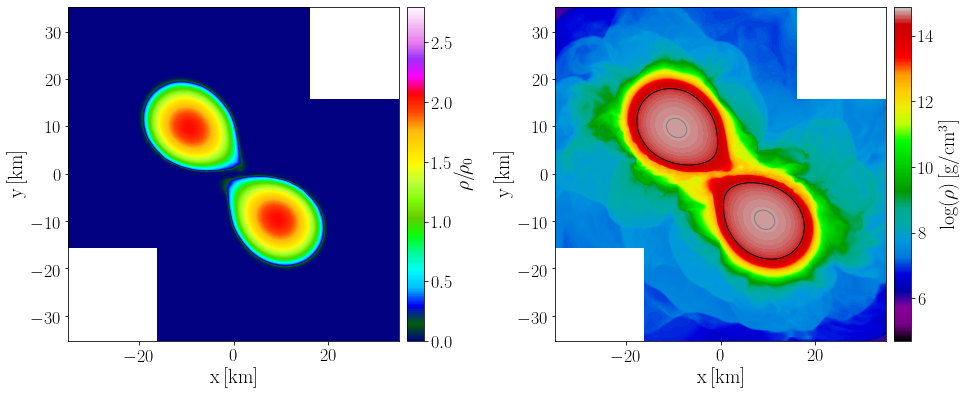

In [7]:
plt.figure(0)
gs = gridspec.GridSpec(1, 2, width_ratios=[1,1], wspace=0.20)
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])
cmap1 = plt.get_cmap("gist_ncar")
cmap2 = plt.get_cmap("nipy_spectral")

ax2_clevels=[np.log10(normalnuc),np.log10(2*normalnuc)]
ax2_clevels_c=["black","grey"]

data=density5
xdat=x5
ydat=y5

cm1 = ax1.imshow(urho/normalnuc*data.T,vmin=0,vmax=2.8,cmap=cmap1,interpolation="bicubic",
                 extent=(xdat.min()*ulength,xdat.max()*ulength,ydat.min()*ulength,ydat.max()*ulength))
cbar1 = plt.colorbar(cm1,ax=ax1,ticks=[0,0.5,1,1.5,2,2.5],pad=0.02)
cbar1.set_label(r'$\rm \rho/\!\rho_{0}$',size=20)
    
cm2 = ax2.imshow(np.log10(urho*data.T),vmin=4.7,vmax=14.88,cmap=cmap2,interpolation="bicubic",
                 extent=(xdat.min()*ulength,xdat.max()*ulength,ydat.min()*ulength,ydat.max()*ulength))
cm2a = ax2.contour(ulength*xdat,-ulength*ydat,np.log10(urho*data),levels=ax2_clevels,colors=ax2_clevels_c,
                   linewidths=1,linestyles='-')
cbar2 = plt.colorbar(cm2,ax=ax2,ticks=[6,8,10,12,14],pad=0.02)
cbar2.set_label(r'$\rm log(\rho) \,[g/cm^3]$',size=20)

ax1.set_xlabel(r'$\rm x \,[km]$')
ax2.set_xlabel(r'$\rm x \,[km]$')
ax1.set_ylabel(r'$\rm y \,[km]$')
ax2.set_ylabel(r'$\rm y \,[km]$')
plt.show()

Wir stellen uns nun die Dichte auf dem dritten Refinement-Level (RL=3) dar.

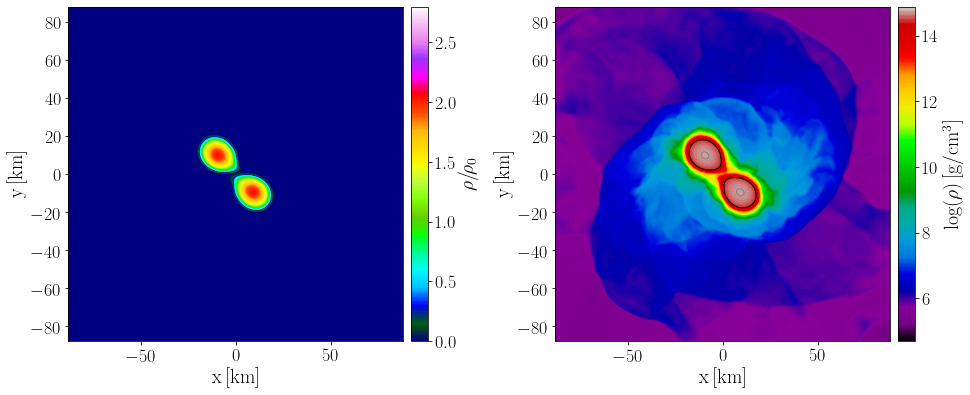

In [8]:
plt.figure(0)
gs = gridspec.GridSpec(1, 2, width_ratios=[1,1], wspace=0.20)
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])
cmap1 = plt.get_cmap("gist_ncar")
cmap2 = plt.get_cmap("nipy_spectral")

data=density3
xdat=x3
ydat=y3

cm1 = ax1.imshow(urho/normalnuc*data.T,vmin=0,vmax=2.8,cmap=cmap1,interpolation="bicubic",
                 extent=(xdat.min()*ulength,xdat.max()*ulength,ydat.min()*ulength,ydat.max()*ulength))
cbar1 = plt.colorbar(cm1,ax=ax1,ticks=[0,0.5,1,1.5,2,2.5],pad=0.02)
cbar1.set_label(r'$\rm \rho/\!\rho_{0}$',size=20)
    
cm2 = ax2.imshow(np.log10(urho*data.T),vmin=4.7,vmax=14.88,cmap=cmap2,interpolation="bicubic",
                 extent=(xdat.min()*ulength,xdat.max()*ulength,ydat.min()*ulength,ydat.max()*ulength))
cm2a = ax2.contour(ulength*xdat,-ulength*ydat,np.log10(urho*data),levels=ax2_clevels,colors=ax2_clevels_c,
                   linewidths=1,linestyles='-')
cbar2 = plt.colorbar(cm2,ax=ax2,ticks=[6,8,10,12,14],pad=0.02)
cbar2.set_label(r'$\rm log(\rho) \,[g/cm^3]$',size=20)

ax1.set_xlabel(r'$\rm x \,[km]$')
ax2.set_xlabel(r'$\rm x \,[km]$')
ax1.set_ylabel(r'$\rm y \,[km]$')
ax2.set_ylabel(r'$\rm y \,[km]$')
plt.show()

und nun auf dem größten und gröbsten Refinement-Level (RL=0):

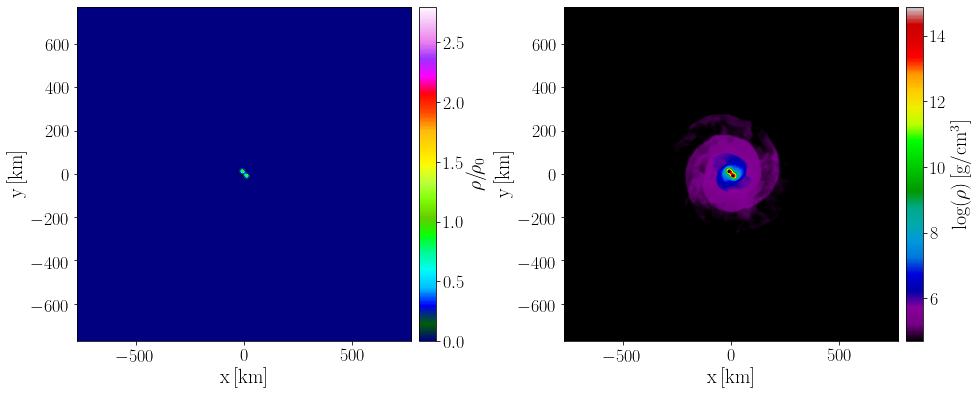

In [9]:
plt.figure(0)
gs = gridspec.GridSpec(1, 2, width_ratios=[1,1], wspace=0.20)
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])
cmap1 = plt.get_cmap("gist_ncar")
cmap2 = plt.get_cmap("nipy_spectral")

ax2_clevels=[np.log10(normalnuc),np.log10(2*normalnuc),np.log10(3*normalnuc)]
ax2_clevels_c=["black","grey","white"]

data=density0
xdat=x0
ydat=y0

cm1 = ax1.imshow(urho/normalnuc*data.T,vmin=0,vmax=2.8,cmap=cmap1,interpolation="bicubic",
                 extent=(xdat.min()*ulength,xdat.max()*ulength,ydat.min()*ulength,ydat.max()*ulength))
cbar1 = plt.colorbar(cm1,ax=ax1,ticks=[0,0.5,1,1.5,2,2.5],pad=0.02)
cbar1.set_label(r'$\rm \rho/\!\rho_{0}$',size=20)
    
cm2 = ax2.imshow(np.log10(urho*data.T),vmin=4.7,vmax=14.88,cmap=cmap2,interpolation="bicubic",
                 extent=(xdat.min()*ulength,xdat.max()*ulength,ydat.min()*ulength,ydat.max()*ulength))
cm2a = ax2.contour(ulength*xdat,-ulength*ydat,np.log10(urho*data),levels=ax2_clevels,colors=ax2_clevels_c,
                   linewidths=1,linestyles='-')
cbar2 = plt.colorbar(cm2,ax=ax2,ticks=[6,8,10,12,14],pad=0.02)
cbar2.set_label(r'$\rm log(\rho) \,[g/cm^3]$',size=20)

ax1.set_xlabel(r'$\rm x \,[km]$')
ax2.set_xlabel(r'$\rm x \,[km]$')
ax1.set_ylabel(r'$\rm y \,[km]$')
ax2.set_ylabel(r'$\rm y \,[km]$')
plt.show()

Wir visualisieren uns nun die Bewegung der Neutronensterne auf dem 5. Refinement-Level in einer Animation.

In [10]:
import matplotlib.animation as animation
from IPython.display import HTML

In [11]:
step=100
anzframes=len(itr_list)
xylim=40
RL = 5

fig = plt.figure()
gs = gridspec.GridSpec(1, 2, width_ratios=[1,1], wspace=0.15)
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])
cbar1 = plt.colorbar(cm1,ax=ax1,ticks=[0,0.5,1,1.5,2,2.5],pad=0.02)
cbar1.set_label(r'$\rm \rho/\!\rho_{0}$',size=20)
cbar2 = plt.colorbar(cm2,ax=ax2,ticks=[6,8,10,12,14],pad=0.02)
cbar2.set_label(r'$\rm log(\rho) \,[g/cm^3]$',size=20)

def animate(i):
    ax1.cla() 
    ax2.cla() 
    IT = itr_list[i]
    x, y, density = get_data(dichte_xy, IT, RL)
    cm1 = ax1.imshow(urho/normalnuc*density.T,vmin=0,vmax=2.8,cmap=cmap1,interpolation="bicubic",
                 extent=(x.min()*ulength,x.max()*ulength,y.min()*ulength,y.max()*ulength))
    
    cm2 = ax2.imshow(np.log10(urho*density.T),vmin=4.7,vmax=14.88,cmap=cmap2,interpolation="bicubic",
                 extent=(x.min()*ulength,x.max()*ulength,y.min()*ulength,y.max()*ulength))
    cm2a = ax2.contour(ulength*x,-ulength*y,np.log10(urho*density),levels=ax2_clevels,colors=ax2_clevels_c,
                   linewidths=1,linestyles='-')
    ax1.set_xlabel(r'$\rm x \,[km]$')
    ax2.set_xlabel(r'$\rm x \,[km]$')
    ax1.set_ylabel(r'$\rm y \,[km]$')
    ax2.set_ylabel(r'$\rm y \,[km]$')
    ax1.set_xlim(-xylim, xylim)
    ax1.set_ylim(-xylim, xylim)
    ax2.set_xlim(-xylim, xylim)
    ax2.set_ylim(-xylim, xylim)
    return fig,

ani = animation.FuncAnimation(fig,animate,frames=anzframes,interval=500)
plt.close(ani._fig)
HTML(ani.to_html5_video())

Man erkennt in dieser Animation gut, dass sich das innerste Refinement-Level, zu diesem Zeitpunkt der Simulation (Inspiral Phase) noch aus zwei getrennten Gitter-Bereichen zusammensetzt, die der Bewegung der beiden Neutronensterne folgen.

Wir visualisieren uns nun die Bewegung der Neutronensterne auf dem 2. Refinement-Level in einer Animation.

In [12]:
step=100
anzframes=len(itr_list)
xylim=210
RL = 2

fig = plt.figure()
gs = gridspec.GridSpec(1, 2, width_ratios=[1,1], wspace=0.15)
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])
cbar1 = plt.colorbar(cm1,ax=ax1,ticks=[0,0.5,1,1.5,2,2.5],pad=0.02)
cbar1.set_label(r'$\rm \rho/\!\rho_{0}$',size=20)
cbar2 = plt.colorbar(cm2,ax=ax2,ticks=[6,8,10,12,14],pad=0.02)
cbar2.set_label(r'$\rm log(\rho) \,[g/cm^3]$',size=20)

def animate(i):
    ax1.cla() 
    ax2.cla() 
    IT = itr_list[i]
    x, y, density = get_data(dichte_xy, IT, RL)
    cm1 = ax1.imshow(urho/normalnuc*density.T,vmin=0,vmax=2.8,cmap=cmap1,interpolation="bicubic",
                 extent=(x.min()*ulength,x.max()*ulength,y.min()*ulength,y.max()*ulength))
    
    cm2 = ax2.imshow(np.log10(urho*density.T),vmin=4.7,vmax=14.88,cmap=cmap2,interpolation="bicubic",
                 extent=(x.min()*ulength,x.max()*ulength,y.min()*ulength,y.max()*ulength))
    cm2a = ax2.contour(ulength*x,-ulength*y,np.log10(urho*density),levels=ax2_clevels,colors=ax2_clevels_c,
                   linewidths=1,linestyles='-')
    ax1.set_xlabel(r'$\rm x \,[km]$')
    ax2.set_xlabel(r'$\rm x \,[km]$')
    ax1.set_ylabel(r'$\rm y \,[km]$')
    ax2.set_ylabel(r'$\rm y \,[km]$')
    ax1.set_xlim(-xylim, xylim)
    ax1.set_ylim(-xylim, xylim)
    ax2.set_xlim(-xylim, xylim)
    ax2.set_ylim(-xylim, xylim)
    return fig,

ani = animation.FuncAnimation(fig,animate,frames=anzframes,interval=500)
plt.close(ani._fig)
HTML(ani.to_html5_video())

In der oberen rechten Animation erkennt man gut, dass auch schon in während der "Inspiral Phase" Materie vom System emittiert wird.

Wir wollen uns nun die Neutronenstern Kollision nach der Kollision, in der sogenannten "Postmerger Phase" betrachten. Bei der verwendeten Zustandsgleichung (DD2) und der Gesamtmasse des Systems bildet sich ein supramassiver Neutronenstern. Wir wollen uns einige Eigenschaften dieses Sterns visualisieren und betrachten uns speziell die Dichte $\rho$, die Lapse-Funktion $\alpha$, die Temperatur $T$ und den Realteil des Weyl Skalars $\psi_4$ mit dem man die Gravitationswellen-Amplituden $h_+$ und $h_\times$ mittels zweifacher zeitlicher Integration berechnen kann (siehe <A href="https://link.springer.com/article/10.1007/s41114-016-0001-9" target="_blank">Bishop, N. T. and Rezzolla, L. (2016). Extraction of gravitational waves in numerical relativity. Living reviews in relativity, 19(1), 1-117.</A> )
$$
\begin{equation}
\psi_4=\frac{\partial^2}{{\partial t}^2}\left( h_+ - i\, h_\times  \right) \quad .
\end{equation}
$$

Wir lesen uns wieder einen Ausschnitt der Daten der Postmerger Phase ein (Übergang Disko-Fox Phase nach Merengue Phase).

In [13]:
dichte_xy = hdf5.dataset("./ET-Data/LukeBovard-DD2-135/Postmerger/rho.xy.h5")
alpha_xy = hdf5.dataset("./ET-Data/LukeBovard-DD2-135/Postmerger/alp.xy.h5")
temp_xy = hdf5.dataset("./ET-Data/LukeBovard-DD2-135/Postmerger/temperature.xy.h5")
gw_xy = hdf5.dataset("./ET-Data/LukeBovard-DD2-135/Postmerger/Psi4r.xy.h5")

In [14]:
itr_list=dichte_xy.iterations
np.array(itr_list)

array([291840, 292864, 293888, 294912, 295936, 296960, 297984, 299008,
       300032, 301056, 302080, 303104, 304128, 305152, 306176, 307200,
       308224, 309248, 310272, 311296, 312320, 313344, 314368, 315392,
       316416, 317440, 318464, 319488, 320512, 321536, 322560, 323584,
       324608, 325632, 326656, 327680, 328704, 329728, 330752, 331776,
       332800, 333824, 334848, 335872, 336896, 337920, 338944, 339968,
       340992, 342016, 343040, 344064, 345088, 346112, 347136, 348160,
       349184, 350208, 351232, 352256, 353280, 354304, 355328, 356352,
       357376, 358400, 359424, 360448, 361472, 362496, 363520, 364544,
       365568, 366592, 367616, 368640, 369664, 370688, 371712, 372736,
       373760, 374784, 375808, 376832, 377856, 378880, 379904, 380928,
       381952, 382976, 384000, 385024, 386048, 387072, 388096, 389120,
       390144, 391168, 392192, 393216, 394240, 395264, 396288, 397312,
       398336, 399360, 400384, 401408, 402432, 403456, 404480])

Von den 111 Zeitpunkten, die in diesen Daten enthalten sind betrachten wir uns zunächst nur die ersten 20 und stellen uns wieder die Dichte dar.

In [15]:
step=100
anzframes=20
xylim=25
RL = 5

fig = plt.figure()
gs = gridspec.GridSpec(1, 2, width_ratios=[1,1], wspace=0.10)
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])
cbar1 = plt.colorbar(cm1,ax=ax1,ticks=[0,0.5,1,1.5,2,2.5],pad=0.02)
cbar1.set_label(r'$\rm \rho/\!\rho_{0}$',size=20)
cbar2 = plt.colorbar(cm2,ax=ax2,ticks=[6,8,10,12,14],pad=0.02)
cbar2.set_label(r'$\rm log(\rho) \,[g/cm^3]$',size=20)

def animate(i):
    ax1.cla() 
    ax2.cla() 
    IT = itr_list[i]
    x, y, density = get_data(dichte_xy, IT, RL)
    cm1 = ax1.imshow(urho/normalnuc*density.T,vmin=0,vmax=2.8,cmap=cmap1,interpolation="bicubic",
                 extent=(x.min()*ulength,x.max()*ulength,y.min()*ulength,y.max()*ulength))
    
    cm2 = ax2.imshow(np.log10(urho*density.T),vmin=4.7,vmax=14.88,cmap=cmap2,interpolation="bicubic",
                 extent=(x.min()*ulength,x.max()*ulength,y.min()*ulength,y.max()*ulength))
    cm2a = ax2.contour(ulength*x,-ulength*y,np.log10(urho*density),levels=ax2_clevels,colors=ax2_clevels_c,
                   linewidths=1,linestyles='-')
    ax1.set_xlabel(r'$\rm x \,[km]$')
    ax2.set_xlabel(r'$\rm x \,[km]$')
    ax1.set_ylabel(r'$\rm y \,[km]$')
    ax2.set_ylabel(r'$\rm y \,[km]$')
    ax1.set_xlim(-xylim, xylim)
    ax1.set_ylim(-xylim, xylim)
    ax2.set_xlim(-xylim, xylim)
    ax2.set_ylim(-xylim, xylim)
    return fig,

ani = animation.FuncAnimation(fig,animate,frames=anzframes,interval=500)
plt.close(ani._fig)
HTML(ani.to_html5_video())

Nun visualisieren wir uns auch die anderen Größen (hier speziell den letzten Zeitpunkt bei der Iteration 404480).

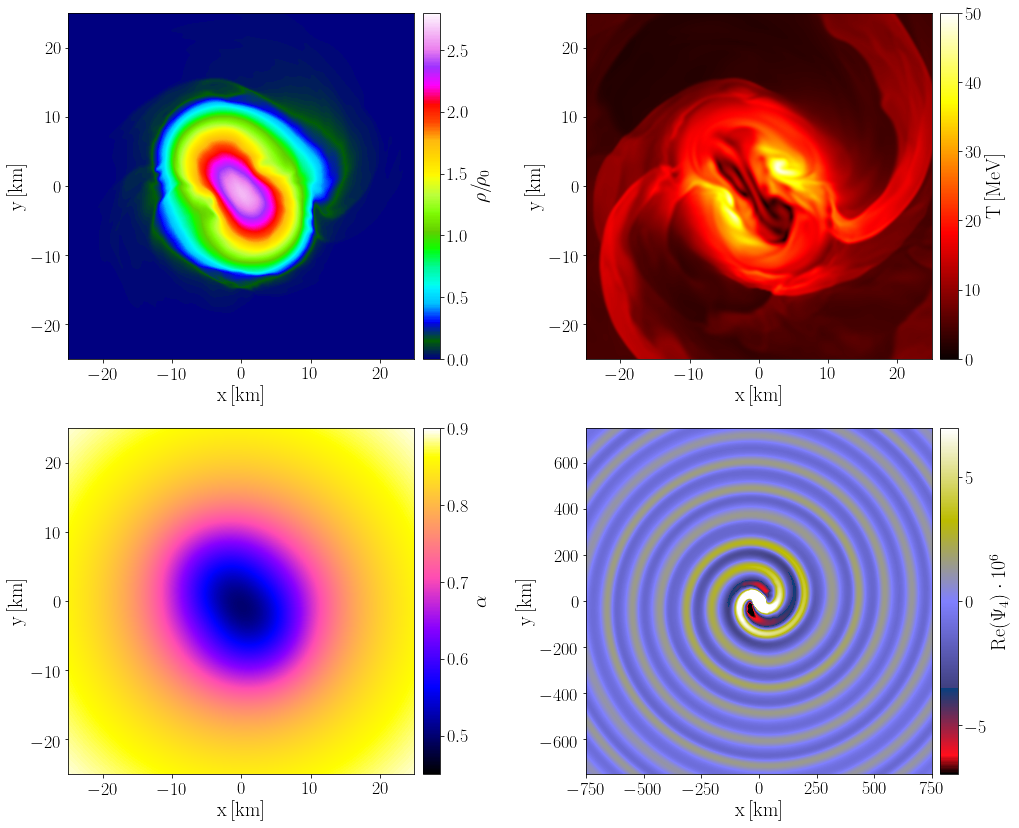

In [16]:
xylim=25
RL=5
IT = itr_list[-1]
x, y, density = get_data(dichte_xy, IT, RL)
x, y, alpha = get_data(alpha_xy, IT, RL)
x, y, temp = get_data(temp_xy, IT, RL)
x0, y0, gw = get_data(gw_xy, IT, 0)

plt.figure(figsize=(17,14))
gs = gridspec.GridSpec(2, 2, width_ratios=[1,1], wspace=0.2)
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])
ax3 = plt.subplot(gs[2])
ax4 = plt.subplot(gs[3])
cmap1 = plt.get_cmap("gist_ncar")
cmap2 = plt.get_cmap("hot")
cmap3 = plt.get_cmap("gnuplot2")
cmap4 = plt.get_cmap("gist_stern")

cm1 = ax1.imshow(urho/normalnuc*density.T,vmin=0,vmax=2.8,cmap=cmap1,interpolation="bicubic",
                 extent=(x.min()*ulength,x.max()*ulength,y.min()*ulength,y.max()*ulength))    
cm2 = ax2.imshow(temp.T,vmin=0,vmax=50,cmap=cmap2,interpolation="bicubic",
                 extent=(x.min()*ulength,x.max()*ulength,y.min()*ulength,y.max()*ulength))
cm3 = ax3.imshow(alpha.T,vmin=0.45,vmax=0.9,cmap=cmap3,interpolation="bicubic",
                 extent=(x.min()*ulength,x.max()*ulength,y.min()*ulength,y.max()*ulength))    
cm4 = ax4.imshow(gw.T*10**6,vmin=-7,vmax=7,cmap=cmap4,interpolation="bicubic",
                 extent=(x0.min()*ulength,x0.max()*ulength,y0.min()*ulength,y0.max()*ulength))

cbar1 = plt.colorbar(cm1,ax=ax1,ticks=[0,0.5,1,1.5,2,2.5],pad=0.02)
cbar1.set_label(r'$\rm \rho/\!\rho_{0}$',size=20)
cbar2 = plt.colorbar(cm2,ax=ax2,ticks=[0,10,20,30,40,50],pad=0.02)
cbar2.set_label(r'$\rm T\,[MeV]$',size=20)
cbar3 = plt.colorbar(cm3,ax=ax3,ticks=[0.5,0.6,0.7,0.8,0.9],pad=0.02)
cbar3.set_label(r'$\rm \alpha$',size=20)
cbar4 = plt.colorbar(cm4,ax=ax4,ticks=[-5,0,5],pad=0.02)
cbar4.set_label(r'${\rm Re}(\Psi_4) \cdot 10^6$',size=20)

ax1.set_xlabel(r'$\rm x \,[km]$')
ax2.set_xlabel(r'$\rm x \,[km]$')
ax3.set_xlabel(r'$\rm x \,[km]$')
ax4.set_xlabel(r'$\rm x \,[km]$')
ax1.set_ylabel(r'$\rm y \,[km]$')
ax2.set_ylabel(r'$\rm y \,[km]$')
ax3.set_ylabel(r'$\rm y \,[km]$')
ax4.set_ylabel(r'$\rm y \,[km]$')
ax1.set_xlim(-xylim, xylim)
ax1.set_ylim(-xylim, xylim)
ax2.set_xlim(-xylim, xylim)
ax2.set_ylim(-xylim, xylim)
ax3.set_xlim(-xylim, xylim)
ax3.set_ylim(-xylim, xylim)
ax4.set_xlim(-750, 750)
ax4.set_ylim(-750, 750)

plt.show()

Wir stellen uns nun die gesamten Daten in einer Animation dar.

In [17]:
step=100
anzframes=len(itr_list)
xylim=25
RL = 5

fig = plt.figure(figsize=(17,14))
gs = gridspec.GridSpec(2, 2, width_ratios=[1,1], wspace=0.2)
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])
ax3 = plt.subplot(gs[2])
ax4 = plt.subplot(gs[3])
cmap1 = plt.get_cmap("gist_ncar")
cmap2 = plt.get_cmap("hot")
cmap3 = plt.get_cmap("gnuplot2")
cmap4 = plt.get_cmap("gist_stern")

def animate(i):
    ax1.cla() 
    ax2.cla() 
    IT = itr_list[i]
    x, y, density = get_data(dichte_xy, IT, RL)
    x, y, alpha = get_data(alpha_xy, IT, RL)
    x, y, temp = get_data(temp_xy, IT, RL)
    x0, y0, gw = get_data(gw_xy, IT, 0)

    cm1 = ax1.imshow(urho/normalnuc*density.T,vmin=0,vmax=2.8,cmap=cmap1,interpolation="bicubic",
                 extent=(x.min()*ulength,x.max()*ulength,y.min()*ulength,y.max()*ulength))    
    cm2 = ax2.imshow(temp.T,vmin=0,vmax=50,cmap=cmap2,interpolation="bicubic",
                 extent=(x.min()*ulength,x.max()*ulength,y.min()*ulength,y.max()*ulength))
    cm3 = ax3.imshow(alpha.T,vmin=0.45,vmax=0.9,cmap=cmap3,interpolation="bicubic",
                 extent=(x.min()*ulength,x.max()*ulength,y.min()*ulength,y.max()*ulength))    
    cm4 = ax4.imshow(gw.T*10**6,vmin=-7,vmax=7,cmap=cmap4,interpolation="bicubic",
                 extent=(x0.min()*ulength,x0.max()*ulength,y0.min()*ulength,y0.max()*ulength))
    
    ax1.set_xlabel(r'$\rm x \,[km]$')
    ax2.set_xlabel(r'$\rm x \,[km]$')
    ax3.set_xlabel(r'$\rm x \,[km]$')
    ax4.set_xlabel(r'$\rm x \,[km]$')
    ax1.set_ylabel(r'$\rm y \,[km]$')
    ax2.set_ylabel(r'$\rm y \,[km]$')
    ax3.set_ylabel(r'$\rm y \,[km]$')
    ax4.set_ylabel(r'$\rm y \,[km]$')
    ax1.set_xlim(-xylim, xylim)
    ax1.set_ylim(-xylim, xylim)
    ax2.set_xlim(-xylim, xylim)
    ax2.set_ylim(-xylim, xylim)
    ax3.set_xlim(-xylim, xylim)
    ax3.set_ylim(-xylim, xylim)
    ax4.set_xlim(-750, 750)
    ax4.set_ylim(-750, 750)
    return fig,

cbar1 = plt.colorbar(cm1,ax=ax1,ticks=[0,0.5,1,1.5,2,2.5],pad=0.02)
cbar1.set_label(r'$\rm \rho/\!\rho_{0}$',size=20)
cbar2 = plt.colorbar(cm2,ax=ax2,ticks=[0,10,20,30,40,50],pad=0.02)
cbar2.set_label(r'$\rm T\,[MeV]$',size=20)
cbar3 = plt.colorbar(cm3,ax=ax3,ticks=[0.5,0.6,0.7,0.8,0.9],pad=0.02)
cbar3.set_label(r'$\rm \alpha$',size=20)
cbar4 = plt.colorbar(cm4,ax=ax4,ticks=[-5,0,5],pad=0.02)
cbar4.set_label(r'${\rm Re}(\Psi_4) \cdot 10^6$',size=20)

ani = animation.FuncAnimation(fig,animate,frames=anzframes,interval=500)
plt.close(ani._fig)
HTML(ani.to_html5_video())

Alle Eigenschaften kann man sich auch in der xz- bzw. yz-Ebene darstellen (für die Dichte rho.xz.h5 bzw. rho.yz.h5).